# Continued Analysis

Here are some potential next steps:

- Clean up columns `15` to `29`, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?
    
    
- Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are they any interesting patterns?

In [709]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

In [710]:
%store -r star_wars
%store -r header_second_row
%store -r characters

In [711]:
# review the content of the survey questions
header_second_row

,index,0
0,RespondentID,NaN
1,Have you seen any of the 6 films in the Star W...,Response
2,Do you consider yourself to be a fan of the St...,Response
3,Which of the following Star Wars films have yo...,Star Wars: Episode I The Phantom Menace
4,Unnamed: 4,Star Wars: Episode II Attack of the Clones
5,Unnamed: 5,Star Wars: Episode III Revenge of the Sith
6,Unnamed: 6,Star Wars: Episode IV A New Hope
7,Unnamed: 7,Star Wars: Episode V The Empire Strikes Back
8,Unnamed: 8,Star Wars: Episode VI Return of the Jedi
9,Please rank the Star Wars films in order of pr...,Star Wars: Episode I The Phantom Menace


# Favorite characters

In [712]:
character_cols = star_wars.columns[15:29]
character_cols

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

In [713]:
characters

15                Han Solo
16          Luke Skywalker
17    Princess Leia Organa
18        Anakin Skywalker
19          Obi Wan Kenobi
20       Emperor Palpatine
21             Darth Vader
22        Lando Calrissian
23               Boba Fett
24                   C-3P0
25                   R2 D2
26           Jar Jar Binks
27           Padme Amidala
28                    Yoda
Name: 0, dtype: object

In [714]:
character_map = dict(zip(character_cols, characters))
star_wars = star_wars.rename(columns=character_map)
star_wars[characters].apply(pd.Series.value_counts, dropna=False)

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Very favorably,610,552,547,245,591,110,310,142,138,474,562,112,168,605
NaN,357,355,355,363,361,372,360,366,374,359,356,365,372,360
Somewhat favorably,151,219,210,269,159,143,171,223,153,229,185,130,183,144
Neither favorably nor unfavorably (neutral),44,38,48,135,43,213,84,236,248,79,57,164,207,51
Unfamiliar (N/A),15,6,8,52,17,156,10,148,132,15,10,109,164,10
Somewhat unfavorably,8,13,12,83,8,68,102,63,96,23,10,102,58,8
Very unfavorably,1,3,6,39,7,124,149,8,45,7,6,204,34,8


In [715]:
favorability_map = {'Neither favorably nor unfavorably (neutral)':'Neutral',
                    'Somewhat favorably':'Favorable',
                    'Very favorably': 'Favorable',
                    'Somewhat unfavorably':'Unfavorable', 
                    'Very unfavorably':'Unfavorable',
                    'Unfamiliar (N/A)':'Unfamiliar'}

for col in characters:
    star_wars[col] = star_wars[col].dropna().map(favorability_map)

In [716]:
favorability_counts = star_wars[characters].apply(pd.Series.value_counts)
favorability_counts

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Favorable,761,771,757,514,750,253,481,365,291,703,747,242,351,749
Neutral,44,38,48,135,43,213,84,236,248,79,57,164,207,51
Unfamiliar,15,6,8,52,17,156,10,148,132,15,10,109,164,10
Unfavorable,9,16,18,122,15,192,251,71,141,30,16,306,92,16


In [717]:
favorability_percents = favorability_counts/favorability_counts.sum()*100
favorability_percents.transpose().sort_values('Favorable', ascending=False)

,Favorable,Neutral,Unfamiliar,Unfavorable
Luke Skywalker,92.779783,4.572804,0.722022,1.925391
Han Solo,91.797346,5.307600,1.809409,1.085645
Princess Leia Organa,91.095066,5.776173,0.962696,2.166065
Obi Wan Kenobi,90.909091,5.212121,2.060606,1.818182
Yoda,90.677966,6.174334,1.210654,1.937046
R2 D2,90.000000,6.867470,1.204819,1.927711
C-3P0,85.006046,9.552600,1.813785,3.627570
Anakin Skywalker,62.454435,16.403402,6.318348,14.823815
Darth Vader,58.232446,10.169492,1.210654,30.387409
Lando Calrissian,44.512195,28.780488,18.048780,8.658537


# Most-viewed movies by demographic segments

## References

- [Visualizing Categorical Data](http://researchhubs.com/post/ai/data-analysis-and-statistical-inference/visualizing-categorical-data.html)
- [Visualizing multivariate categorical data](http://www.sthda.com/english/articles/32-r-graphics-essentials/129-visualizing-multivariate-categorical-data/)
- [Bivariate Analysis - Categorical & Categorical](https://www.saedsayad.com/categorical_categorical.htm)
- [Seaborn - Building mutlti plot grids](http://seaborn.pydata.org/tutorial/axis_grids.html)

In [718]:
demographic_cols = star_wars.columns[34:]
demographic_cols

Index(['Age', 'Household Income', 'Education', 'Location (Census Region)'], dtype='object')

In [719]:
star_wars = star_wars.rename(columns={'Location (Census Region)':'Location'})

In [720]:
movie_seen_cols = ['seen_'+str(i+1) for i in range(6)]
movie_seen_cols.append('Age')
movie_seen_cols.append('Education')
movie_seen_cols.append('Household Income')
movie_seen_cols.append('Location')
df = star_wars[movie_seen_cols]
df

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Age,Education,Household Income,Location
1,True,True,True,True,True,True,18-29,High school degree,NaN,South Atlantic
2,False,False,False,False,False,False,18-29,Bachelor degree,"$0 - $24,999",West South Central
3,True,True,True,False,False,False,18-29,High school degree,"$0 - $24,999",West North Central
4,True,True,True,True,True,True,18-29,Some college or Associate degree,"$100,000 - $149,999",West North Central
5,True,True,True,True,True,True,18-29,Some college or Associate degree,"$100,000 - $149,999",West North Central
...,...,...,...,...,...,...,...,...,...,...
1182,True,True,True,True,True,True,18-29,Some college or Associate degree,"$0 - $24,999",East North Central
1183,True,True,True,True,True,True,30-44,Bachelor degree,"$50,000 - $99,999",Mountain
1184,False,False,False,False,False,False,30-44,Bachelor degree,"$50,000 - $99,999",Middle Atlantic
1185,True,True,True,True,True,True,45-60,Some college or Associate degree,"$100,000 - $149,999",East North Central


## Analysis using Seaborn FacetGrid

### 1. Custom functions to make 1D, 2D and 3D plots

In [796]:
import math
def make_1D_plot(ax, data, kind, stacked, title='Graph'):
    data.plot(ax=ax, kind=kind, stacked=stacked)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    # move the legend under the plot
    ncol = data.shape[1]
    if ncol > 4:
        ncol = math.ceil(ncol/2)
    ax.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=ncol)
    ax.set_title(title)

In [863]:
def make_2D_plots(data, x, y, row, col, margin_titles=True):
    sns.set(style='darkgrid')
    g=sns.FacetGrid(data, row=row, col=col, margin_titles=margin_titles)
    g.map(plt.bar,x, y)
    # rotating xtick labels in Seaborn facetgrid
    for ax in g.axes.ravel():
          ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()

In [878]:
def make_3D_plots(data, x, y, row, col, hue, margin_titles=True):
    sns.set(style='darkgrid')
    g=sns.FacetGrid(data, row=row, col=col, hue=hue, margin_titles=margin_titles)
    g.map(sns.lineplot,x,y)
    g.add_legend()
    # rotating xtick labels in Seaborn facetgrid
    for ax in g.axes.ravel():
          ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    plt.show()

### 2. Most-viewed movies by `Age`

Age     18-29  30-44  45-60   > 60
seen_1  160.0  175.0  181.0  143.0
seen_2  148.0  158.0  148.0  106.0
seen_3  145.0  152.0  142.0  100.0
seen_4  152.0  176.0  165.0  104.0
seen_5  160.0  197.0  220.0  168.0
seen_6  160.0  197.0  210.0  158.0


       seen_1  seen_2  seen_3  seen_4  seen_5  seen_6
Age                                                  
18-29   160.0   148.0   145.0   152.0   160.0   160.0
30-44   175.0   158.0   152.0   176.0   197.0   197.0
45-60   181.0   148.0   142.0   165.0   220.0   210.0
> 60    143.0   106.0   100.0   104.0   168.0   158.0


         seen_1    seen_2    seen_3    seen_4    seen_5    seen_6
Age                                                              
18-29  0.172973  0.160000  0.156757  0.164324  0.172973  0.172973
30-44  0.165877  0.149763  0.144076  0.166825  0.186730  0.186730
45-60  0.169794  0.138837  0.133208  0.154784  0.206379  0.196998
> 60   0.183569  0.136072  0.128370  0.133504  0.215661  0.202824


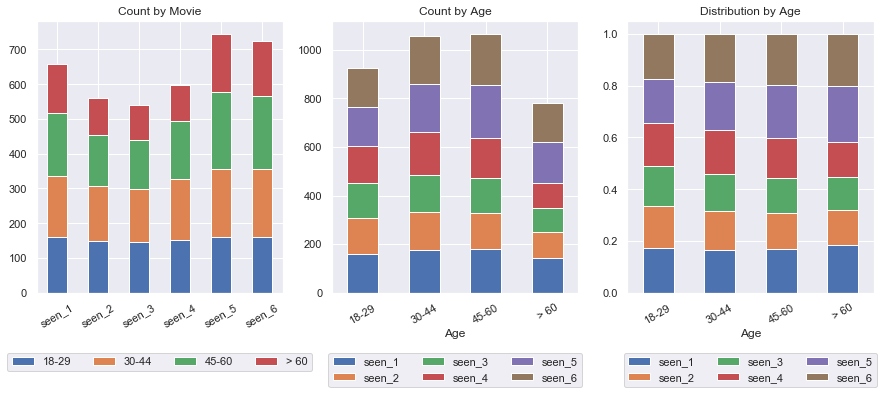

In [837]:
data1 = pd.pivot_table(df, aggfunc=np.sum, index='Age').transpose()
data2 = pd.pivot_table(df, index='Age', aggfunc=np.sum)
pct = data.apply(lambda x: x/sum(x), axis=1)
print(data1)
print('\n')
print(data2)
print('\n')
print(pct)

fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols=3)
make_1D_plot(ax=axes[0], data=data1, kind='bar', stacked=True, title='Count by Movie')
make_1D_plot(ax=axes[1], data=data2, kind='bar', stacked=True, title='Count by Age')
make_1D_plot(ax=axes[2], data=pct, kind='bar', stacked=True, title='Distribution by Age')

- Most of the views responses come from `30-44` and `45-60` age groups. `>60` are found with least responses.

- Based on the respnoses received, `Star Wars: Episode V The Empire Strikes Back` is not only the most viewed movies of all, it's also the most viewed view among all age groups.

- However, we observe more evenly distributed views of all episodes in `18-29` and `30-44` age groups. Especially, `18-29` have almost the same views for all episodes. 

- `45-60` and `>60` have more viewers of Episode 5, 6 and 1. While Episode 2, 3 and 4 are least viewed among these 2 groups. Especially, `>60` group is more obvious in this observation.

### 3. Most-viewed movies by `Location` and `Age`

In [868]:
data = pd.pivot_table(df, aggfunc=np.sum, index=['Location','Age'])
pct_age_location = data.apply(lambda x: x/sum(x), axis=1)
pct_age_location.head()

seen_1    seen_2    seen_3    seen_4    seen_5  \
Location           Age                                                       
East North Central 18-29  0.172131  0.155738  0.155738  0.163934  0.180328   
                   30-44  0.156627  0.138554  0.150602  0.162651  0.198795   
                   45-60  0.157068  0.136126  0.120419  0.162304  0.219895   
                   > 60   0.172414  0.144828  0.151724  0.117241  0.213793   
East South Central 18-29  0.172414  0.137931  0.137931  0.172414  0.206897   

                            seen_6  
Location           Age              
East North Central 18-29  0.172131  
                   30-44  0.192771  
                   45-60  0.204188  
                   > 60   0.200000  
East South Central 18-29  0.172414

In [882]:
cols = ['Location','Age']
melted = pd.melt(pct_age_location.reset_index(), id_vars=cols, var_name='Movie', value_name='Pct')
melted.head()

,Location,Age,Movie,Pct
0,East North Central,18-29,seen_1,0.172131
1,East North Central,30-44,seen_1,0.156627
2,East North Central,45-60,seen_1,0.157068
3,East North Central,> 60,seen_1,0.172414
4,East South Central,18-29,seen_1,0.172414


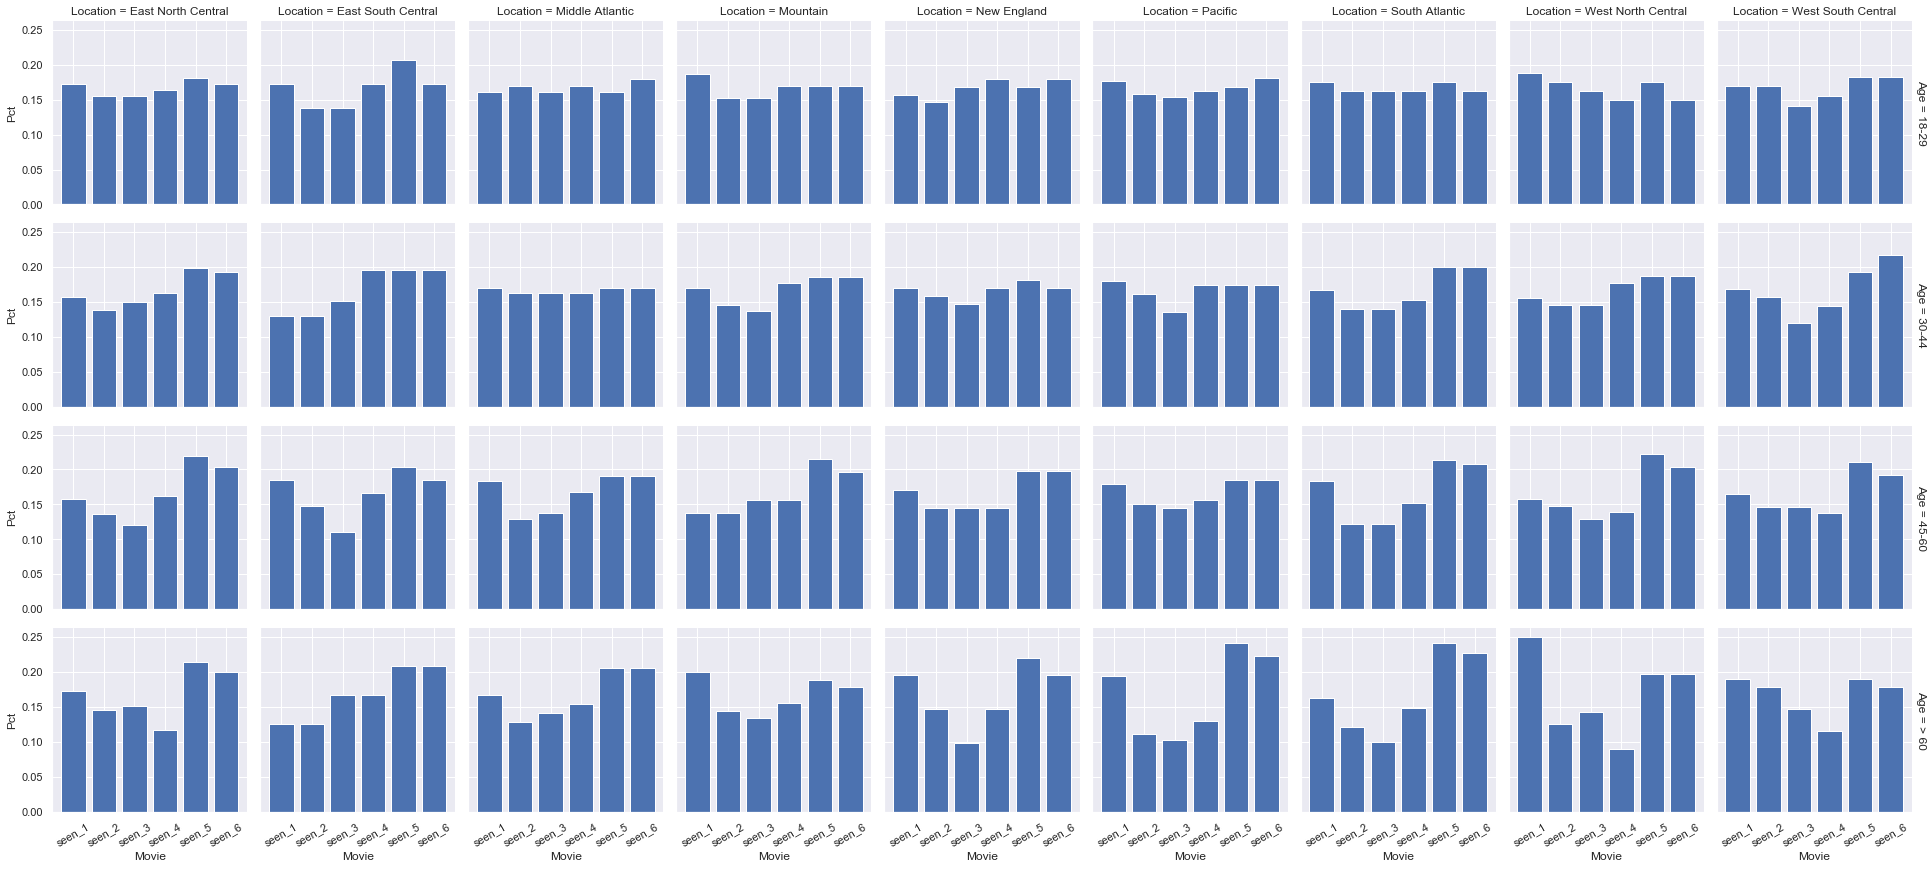

In [883]:
x='Movie'
y='Pct'
row='Age'
col='Location'
make_2D_plots(melted, x, y, row, col)

The above chart examines the distribution of views (`Pct`) by `Age` and `Location` groups, it shows which movie favors the most or the least in which location by which age group.

- Take Episode 5 for example, both `18-29` and `30-44` groups in some locations don't favor it the most. However, this is not the case for `45-60` and `>60`, Episode 5 tops ranks in all locations among these 2 age groups.

- As observed before, `18-29` are found with more evenly distributed views of all episodes and with the added `Location` factor, we can still observe that the distributions in each location among this age group are more even than the others.

### 4. Most-viewed movies by `Household Income` , `Location` and `Age`

In [884]:
data = pd.pivot_table(df, aggfunc=np.sum, index=['Location','Age', 'Household Income'])
pct_age_location_income = data.apply(lambda x: x/sum(x), axis=1)
pct_age_location_income.head(15)

seen_1    seen_2    seen_3  \
Location           Age   Household Income                                    
East North Central 18-29 $0 - $24,999         0.166667  0.166667  0.166667   
                         $100,000 - $149,999  0.153846  0.153846  0.153846   
                         $150,000+            0.166667  0.166667  0.166667   
                         $25,000 - $49,999    0.192308  0.153846  0.115385   
                         $50,000 - $99,999    0.125000  0.250000  0.250000   
                   30-44 $0 - $24,999         0.136364  0.136364  0.136364   
                         $100,000 - $149,999  0.125000  0.125000  0.166667   
                         $150,000+            0.178571  0.142857  0.142857   
                         $25,000 - $49,999    0.166667  0.166667  0.166667   
                         $50,000 - $99,999    0.150943  0.150943  0.169811   
                   45-60 $0 - $24,999         0.153846  0.153846  0.153846   
                         $100,000 - $149,999  0.184211  0.131579  0.131579   
                         $150,000+            0.160000  0.120000  0.120000   
                         $25,000 - $49,999    0.152174  0.152174  0.152174   
                         $50,000 - $99,999    0.147059  0.117647  0.058824   

                                                seen_4    seen_5    seen_6  
Location           Age   Household Income                                   
East North Central 18-29 $0 - $24,999         0.166667  0.166667  0.166667  
                         $100,000 - $149,999  0.153846  0.230769  0.153846  
                         $150,000+            0.166667  0.166667  0.166667  
                         $25,000 - $49,999    0.153846  0.192308  0.192308  
                         $50,000 - $99,999    0.125000  0.125000  0.125000  
                   30-44 $0 - $24,999         0.136364  0.227273  0.227273  
                         $100,000 - $149,999  0.166667  0.208333  0.208333  
                         $150,000+            0.178571  0.178571  0.178571  
                         $25,000 - $49,999    0.166667  0.166667  0.166667  
                         $50,000 - $99,999    0.150943  0.188679  0.188679  
                   45-60 $0 - $24,999         0.153846  0.230769  0.153846  
                         $100,000 - $149,999  0.131579  0.210526  0.210526  
                         $150,000+            0.120000  0.240000  0.240000  
                         $25,000 - $49,999    0.152174  0.195652  0.195652  
                         $50,000 - $99,999    0.205882  0.264706  0.205882

In [885]:
cols = ['Location','Age', 'Household Income']
melted = pd.melt(pct_age_location_income.reset_index(), id_vars=cols, var_name='Movie', value_name='Pct')
melted.head()

,Location,Age,Household Income,Movie,Pct
0,East North Central,18-29,"$0 - $24,999",seen_1,0.166667
1,East North Central,18-29,"$100,000 - $149,999",seen_1,0.153846
2,East North Central,18-29,"$150,000+",seen_1,0.166667
3,East North Central,18-29,"$25,000 - $49,999",seen_1,0.192308
4,East North Central,18-29,"$50,000 - $99,999",seen_1,0.125000


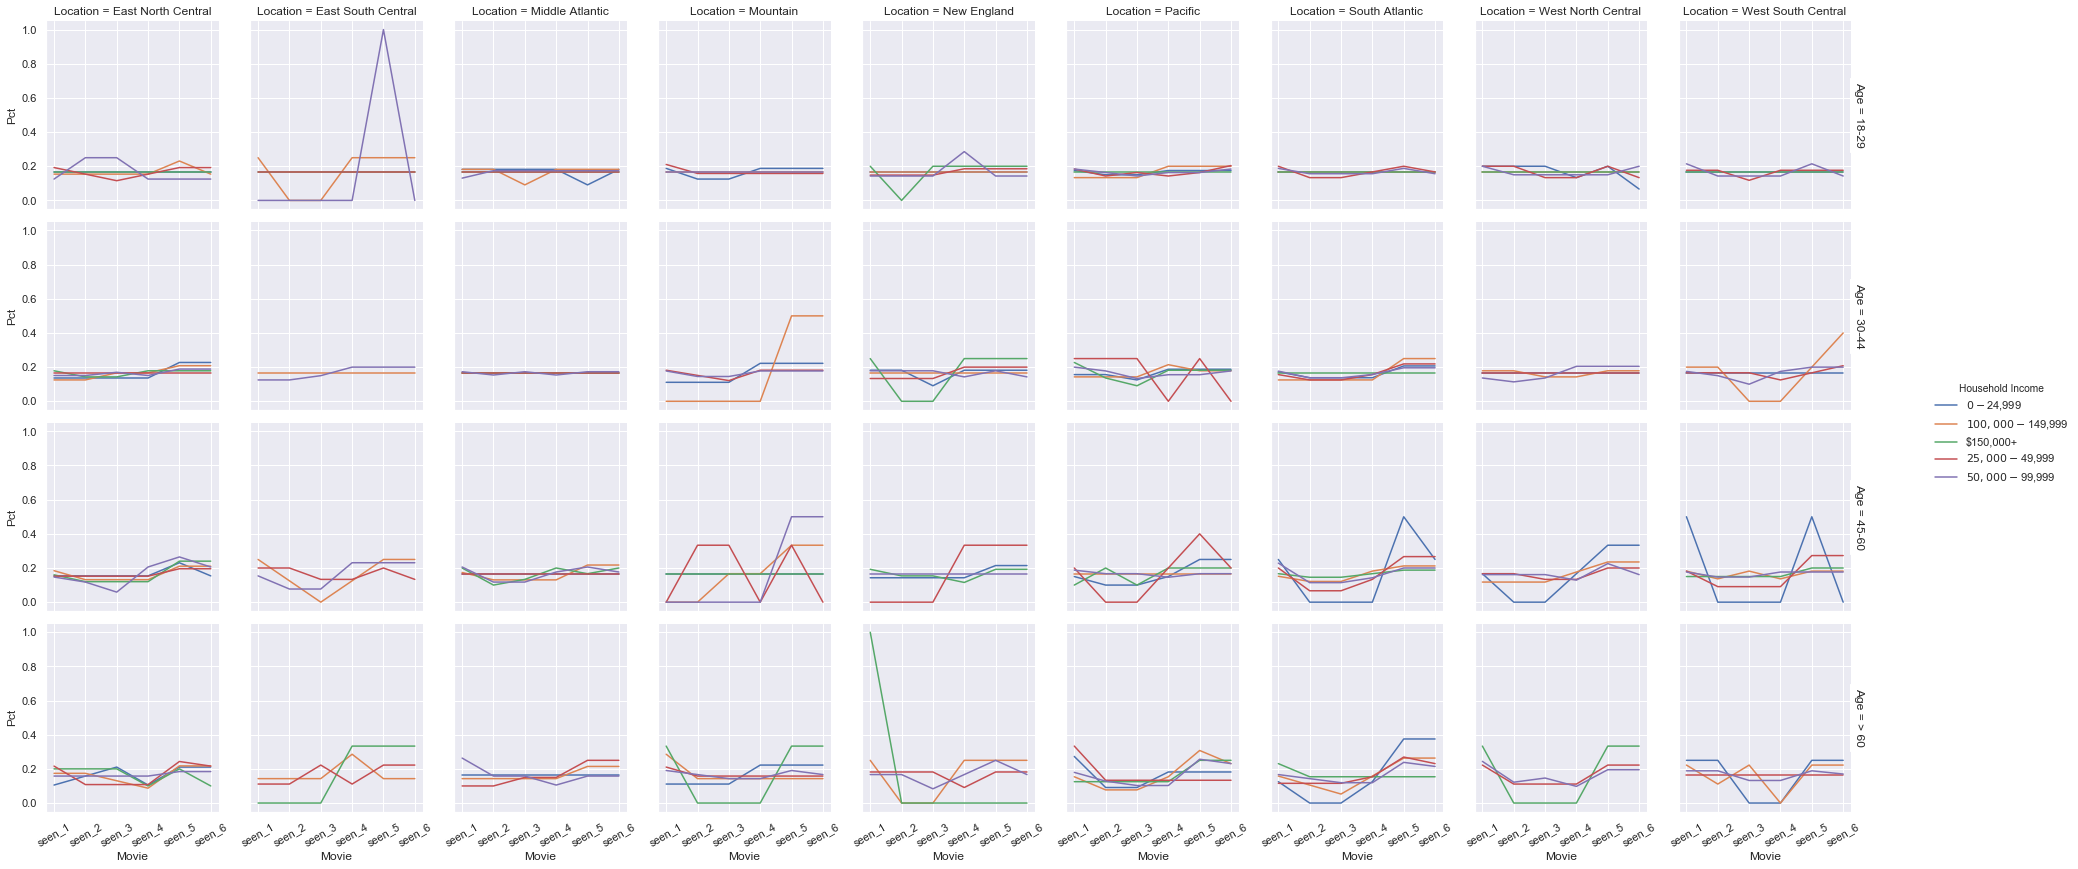

In [886]:
x='Movie'
y='Pct'
row='Age'
col='Location'
hue='Household Income'
make_3D_plots(melted, x, y, row, col, hue)

The chart above examines the distribution of views of different income groups of different ages in different locations. 

For example, in `Pacific` location, 

- people at age `18-29` share almost the same distributions of views regardless of the income level, which is even, i.e. they all favor each Star War episodes almost equally. 

- However, difference in view distribution across income levels is spoted in other age groups. For example, people at age `>60` with high income (`150,000+` and `100,000− 149,999`) favors Episode 1 and 5 more, while other income groups favor all episodes almost the same instead. 


But, to verify, I have make the following **contingency table** to examine how many responses received for each segment: 

In [912]:
d = star_wars.loc[(star_wars['Location']=='Pacific'),['Household Income', 'Age']]
pd.crosstab(d['Household Income'], d['Age'], margins=True)

Age,18-29,30-44,45-60,> 60,All
Household Income,,,,,
"$0 - $24,999",9,8,5,8,30
"$100,000 - $149,999",3,7,8,5,23
"$150,000+",4,6,4,5,19
"$25,000 - $49,999",12,4,3,7,26
"$50,000 - $99,999",9,11,13,12,45
All,37,36,33,37,143


It's obvious that the number of data points for age `>60` in `Pacific` with high income is relatively lower than the rest. With smaller sample size, this trend observed might not be as valid as others.

The sample size concern is even more serious for other segment groups, e.g. the following segment - age `18-29` in `East South Central`:

In [917]:
d = star_wars.loc[(star_wars['Location']=='East South Central'),['Household Income', 'Age']]
pd.crosstab(d['Household Income'], d['Age'], margins=True)

Age,18-29,30-44,45-60,> 60,All
Household Income,,,,,
"$0 - $24,999",1,0,0,0,1
"$100,000 - $149,999",1,1,2,2,6
"$150,000+",1,0,0,1,2
"$25,000 - $49,999",2,0,4,3,9
"$50,000 - $99,999",1,9,4,0,14
All,6,10,10,6,32


Obviously, with only 1 or 2 observaitons in each income group, it's impossible to draw any meaningful conclusions.